# Описание данных

Переменные:

Rank – место по объему продаж


Name – название игры


Platform – платформа, на которой выпущена игра


Year – год релиза


Genre – жанр


Publisher – издатель


NA_Sales – продажи в Северной Америке, в млн.


EU_Sales – продажи в Европе, в млн.


JP_Sales – продажи в Японии, в млн.


Other_Sales – продажи в остальном мире, в млн.


Global_Sales – продажи по всему миру, в млн.

In [3]:
import pandas as pd
import numpy as np
import scipy as scipy

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [4]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-jafizova/statistics/lesson_1/games.csv')

Посмотрим на данные со всех сторон:

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [21]:
#удаляем пропуски
df = df.dropna()

In [14]:
#
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [23]:
df.Year = df.Year.astype('int')

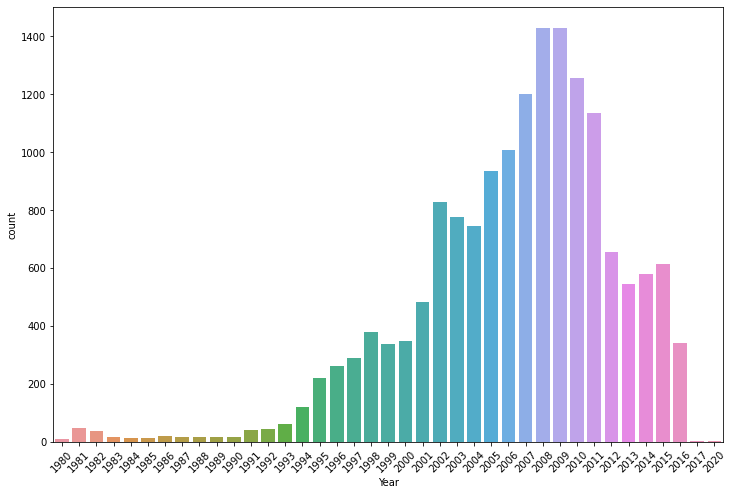

In [24]:
#постройм график распределения количества выпущенных игр по годам.
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x = df.Year)

In [17]:
df['Platform'].value_counts().sum()

16291

На каких платформах произошло больше всего релизов?


Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. 

In [25]:
df_per_platform = df['Platform'].value_counts(normalize=True).mul(100)

In [26]:
df_per_platform = df_per_platform[df_per_platform > 7]

In [27]:
df_per_platform 

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: Platform, dtype: float64

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [28]:
df.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

Сфокусируемся на играх от Nintendo. 

Посчитаем среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [30]:
nintendo = df.query('Publisher == "Nintendo"')

In [31]:
nintendo[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Построим боксплот, где:

по оси x будет расположен жанр игры (Genre)


по оси у – объем продаж в Японии (JP_sales)

In [27]:
nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


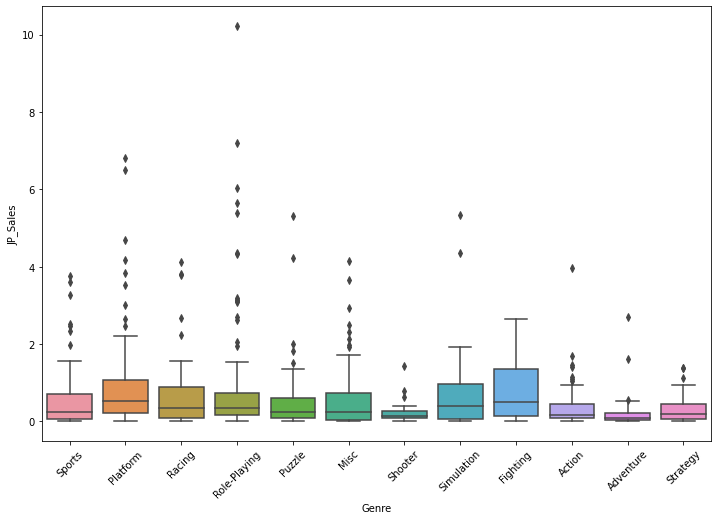

In [32]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(data=nintendo , x='Genre', y='JP_Sales')
#Наибольший межквартильный размах наблюдается у игр жанра Fighting

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

In [33]:
genre_per_year = df.query('Publisher == "Nintendo"')\
                   .query('Genre in ("Fighting","Simulation","Platform","Racing","Sports")')\
                   .groupby(['Year', 'Genre'], as_index=False)\
                   .agg({'Global_Sales':'sum'})

In [34]:
genre_per_year

,Year,Genre,Global_Sales
0,1983,Platform,5.62
1,1983,Sports,3.20
2,1984,Racing,5.68
3,1984,Sports,6.18
4,1985,Platform,43.17
...,...,...,...
109,2014,Sports,0.88
110,2015,Platform,5.24
111,2015,Simulation,2.98
112,2015,Sports,0.45


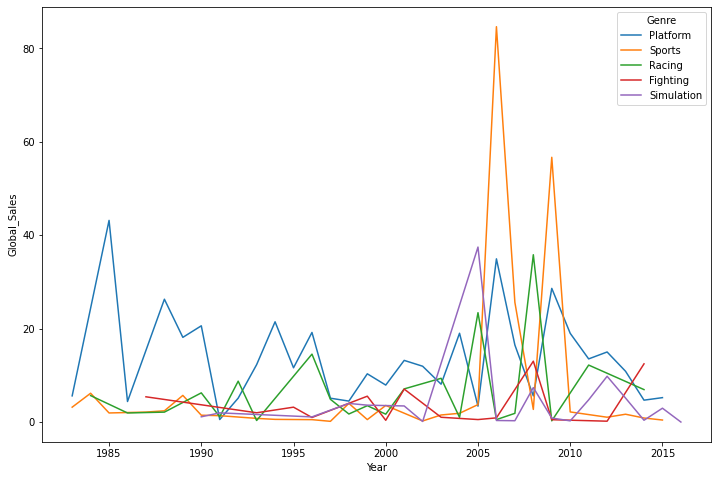

In [35]:
plt.figure(figsize=(12,8))
sns.lineplot(data=genre_per_year , x='Year', y='Global_Sales', hue = 'Genre')